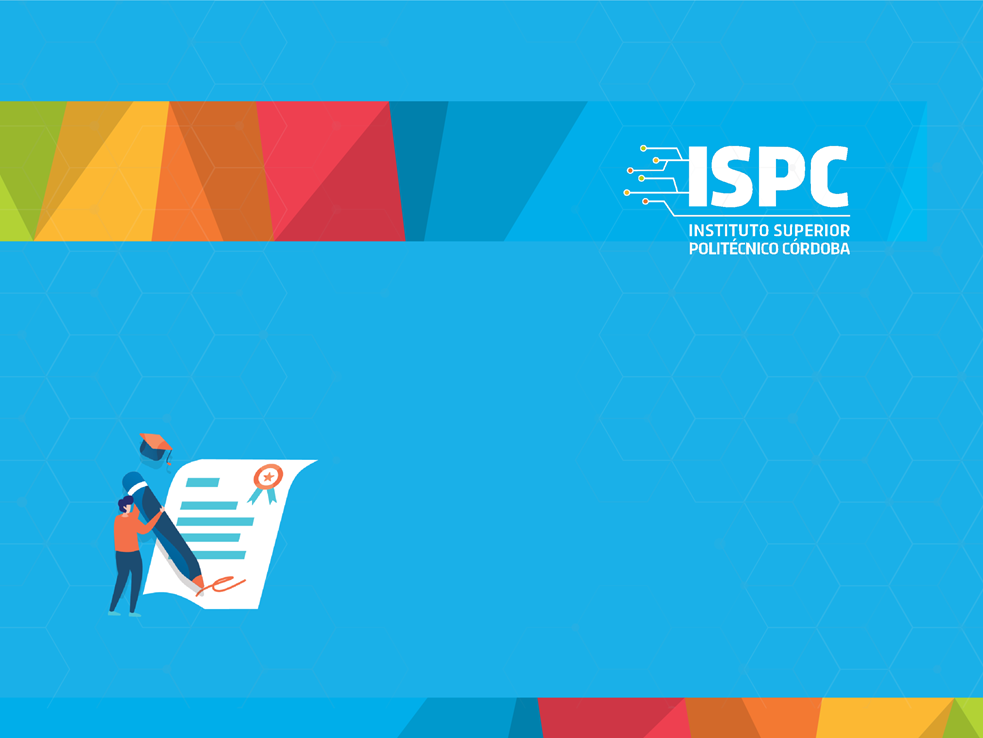

# Bias vs Varianza

Fuente:https://medium.com/@nicolasarrioja/gu%C3%ADa-definitiva-a-bias-variance-tradeoff-94fb5c118d0f


Uno de los conceptos más importantes para poder obtener un óptimo resultado de nuestro modelo es el Bias-Variance tradeoff, por lo que es importante comprenderlo.

Este concepto también es conocido como Compensación Bias-Varianza.

Cuando creamos un modelo de machine learning deseamos que sea lo más eficiente posible para obtener los mejores resultados, pero para lograrlo tenemos que lograr un balance entre el Bias y Variance. Esto nos lleva a la compensación Bias-Variance.

Tanto Bias como Variance son errores en nuestro modelo y buscamos reducirlos, pero no resulta tan sencillo. Cuando logramos reducir Bias notaremos que Variance incrementa, si reducimos variance entonces Bias incrementa. Esto nos lleva a una situación de balance donde ambos deben de ser lo mas pequeños posibles.


## Bias: Es la diferencia entre la predicción esperada de nuestro modelo y los valores verdaderos.

El Bias o sesgo en un modelo de machine learning es muy fácil de entender, simplemente es un tipo de error que indica la diferencia que existe entre la predicción del modelo y el valor actual. Si lo vemos desde la perspectiva de la estadística es la tendencia a sobrestimar o subestimar un parámetro. Si el modelo tiene un Bias alto significa que le presta poca atención a los datos y sobre simplifica el modelo. Esto nos lleva a tener un error alto tanto en training como en test.

Para usar los términos más formales de sesgo y varianza, supongamos que tenemos un estimador puntual $\hat{θ}$ de algún parámetro o función $θ$. Entonces, el sesgo comúnmente se define como la diferencia entre el valor esperado del estimador y el parámetro que queremos estimar:

$$ Bias = E[\hat{θ}]- θ $$

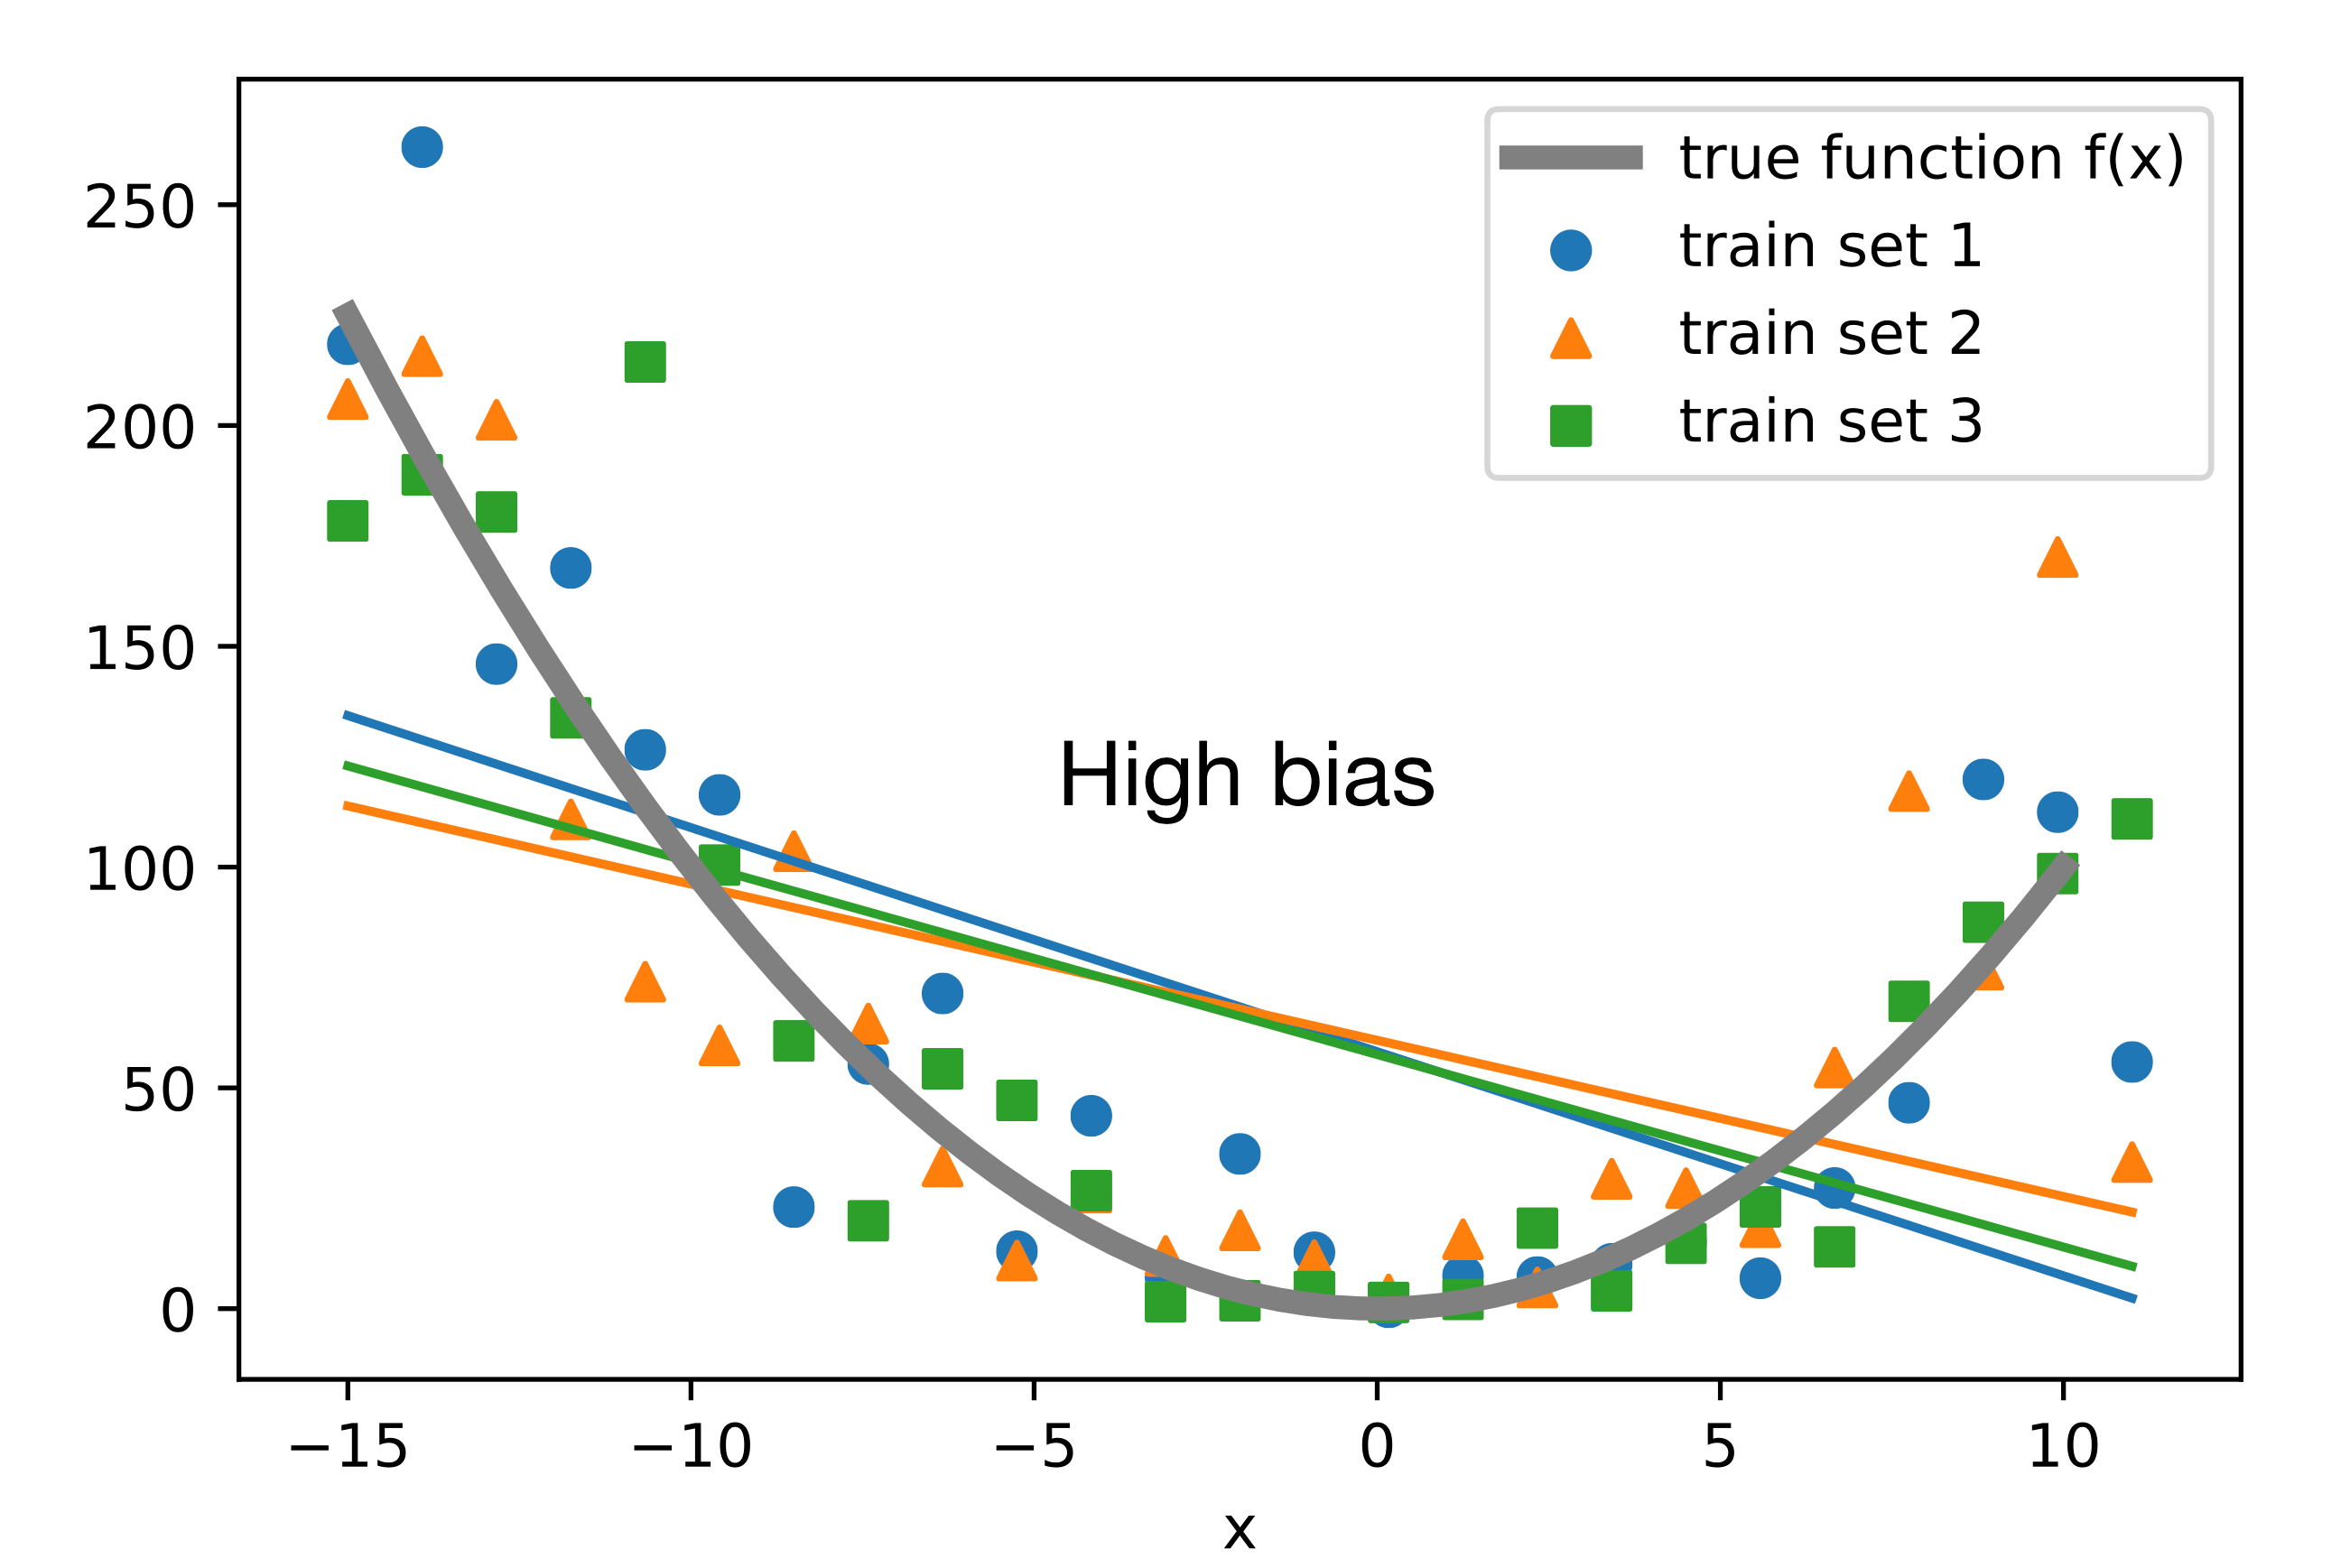



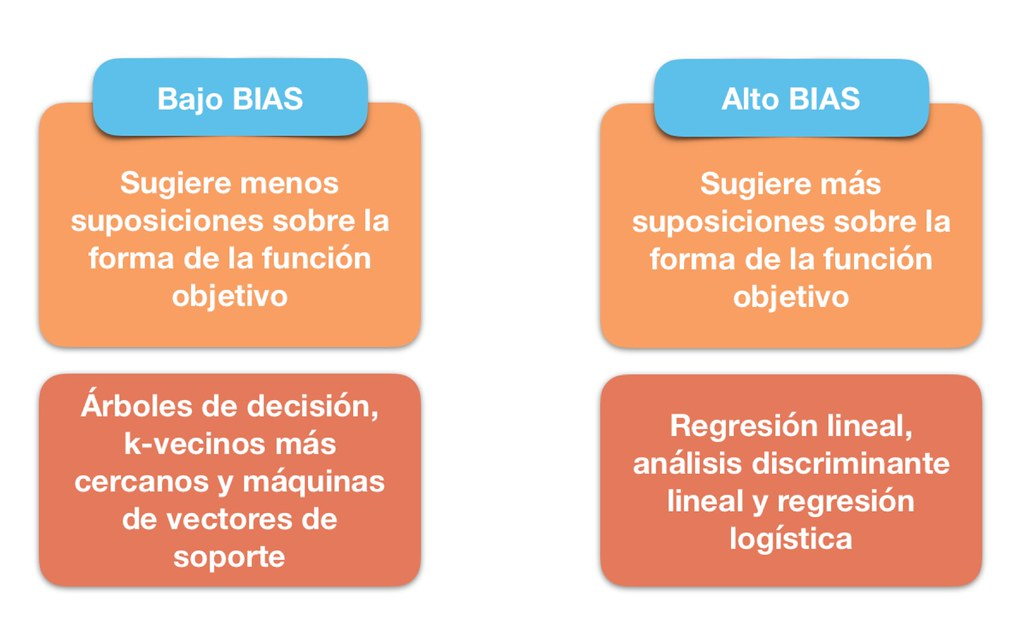

## Variance: Se refiere a la cantidad que la estimación de la función objetivo cambiará si se utiliza diferentes datos de entrenamiento. 

Variance o varianza también se considera un error en el modelo de machine learning que tenemos. Este error lo podemos entender como que tan sensible es nuestro modelo a los datos. Si tenemos exceso de sensibilidad el modelo puede creer ver patrones que realmente no existen ahí. En el contexto de estadística es una medida de dispersión de los datos, es la distancia de cada variable a la media de todas las variables. Si tenemos un valor de Variance alto esto significa que el modelo le presta mucha atención a los datos de entrenamiento y no va a generalizar bien en datos que no ha visto. Esto lo podemos ver cuando en el entrenamiento el modelo funciona muy bien pero tiene mucho error en el test.

$$ Variance = E[(E[\hat{θ}]- \hat{θ})^2] $$



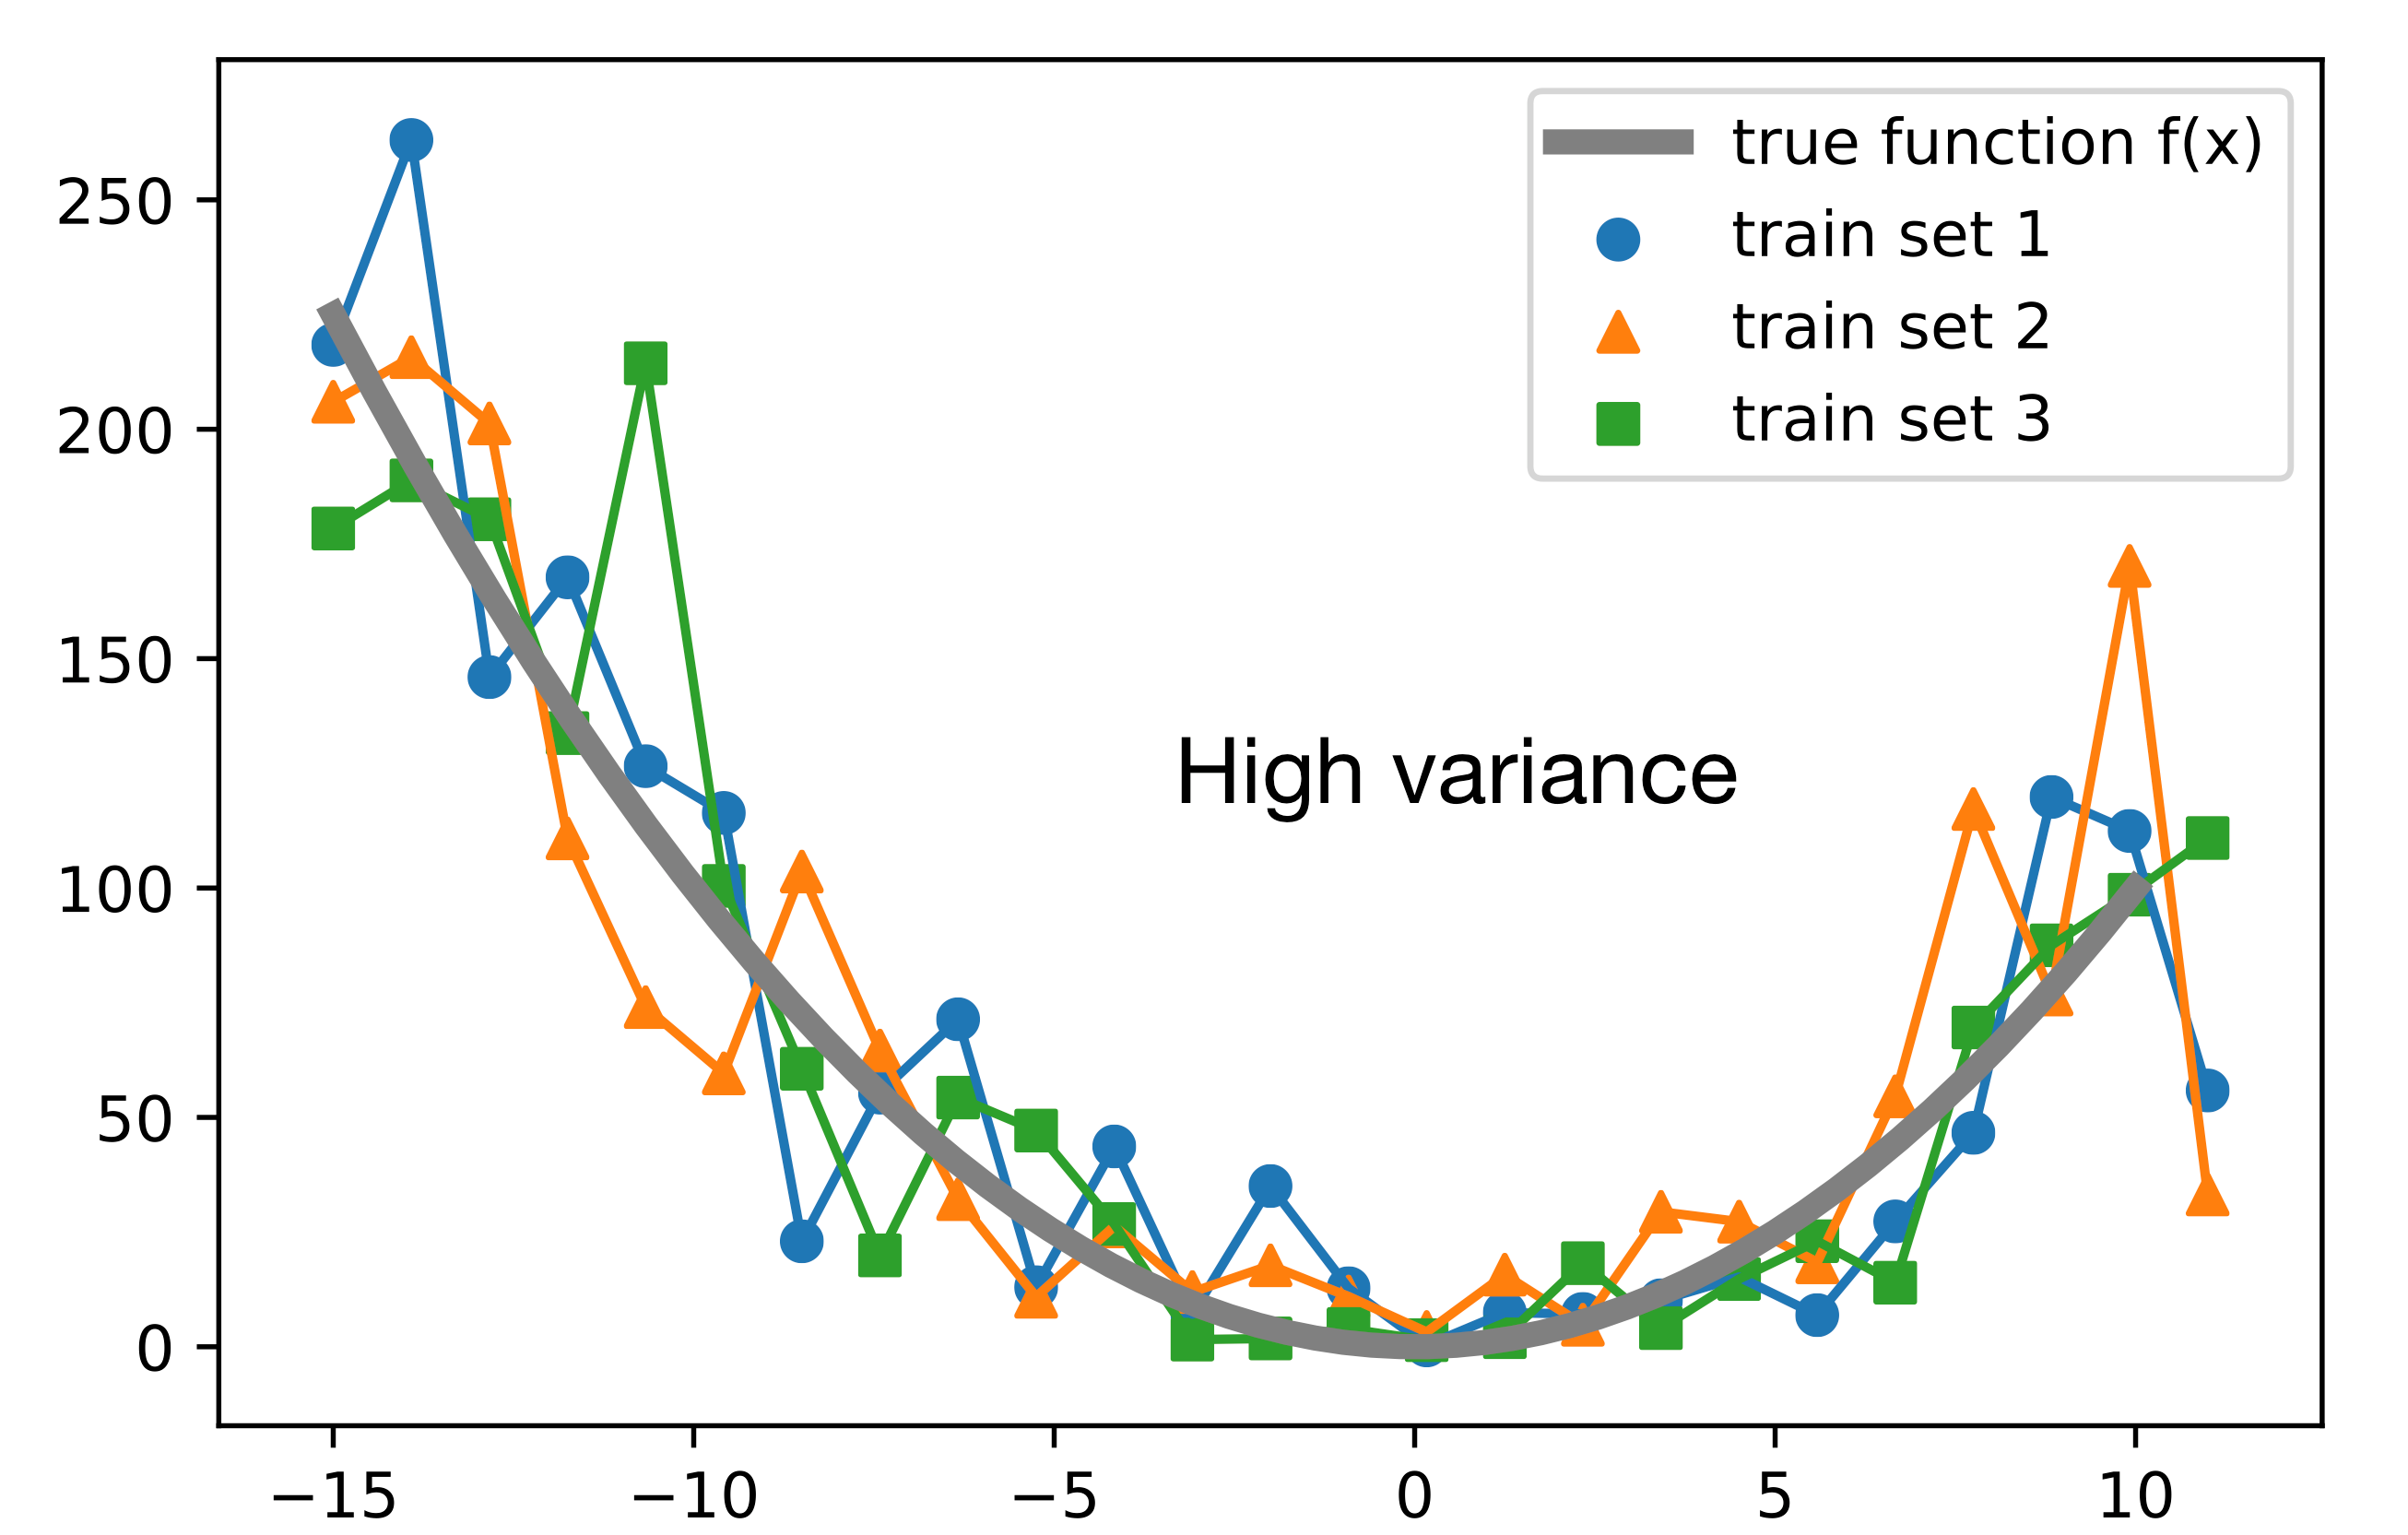


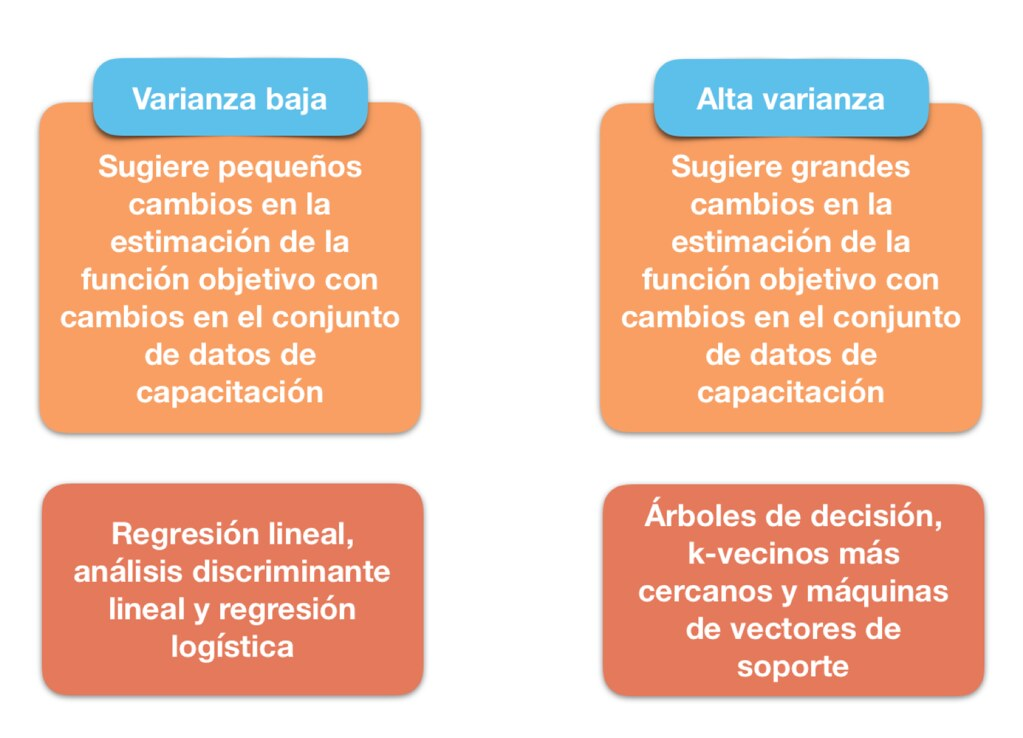

No es posible seleccionar uno sobre otro para reducir, ya que si nos concentramos en uno en particular el modelo puede generar overfit o underfit. En ambos casos nuestro modelo va a tener problemas. La única opción que tenemos es encontrar el punto donde ambos puedan ser lo más pequeños posible.

Tenemos que tomar en cuenta que existe otro tipo de error que no puede ser reducido al crear modelos, sin importar que tan buenos sean. Este error se conoce como error irreductible y simplemente es un medida de la cantidad de ruido que tenemos en nuestros datos. El error total el modelo será:

http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/


$$ Error = [Bias]^2 + Varianza + ErrorIrreductible$$


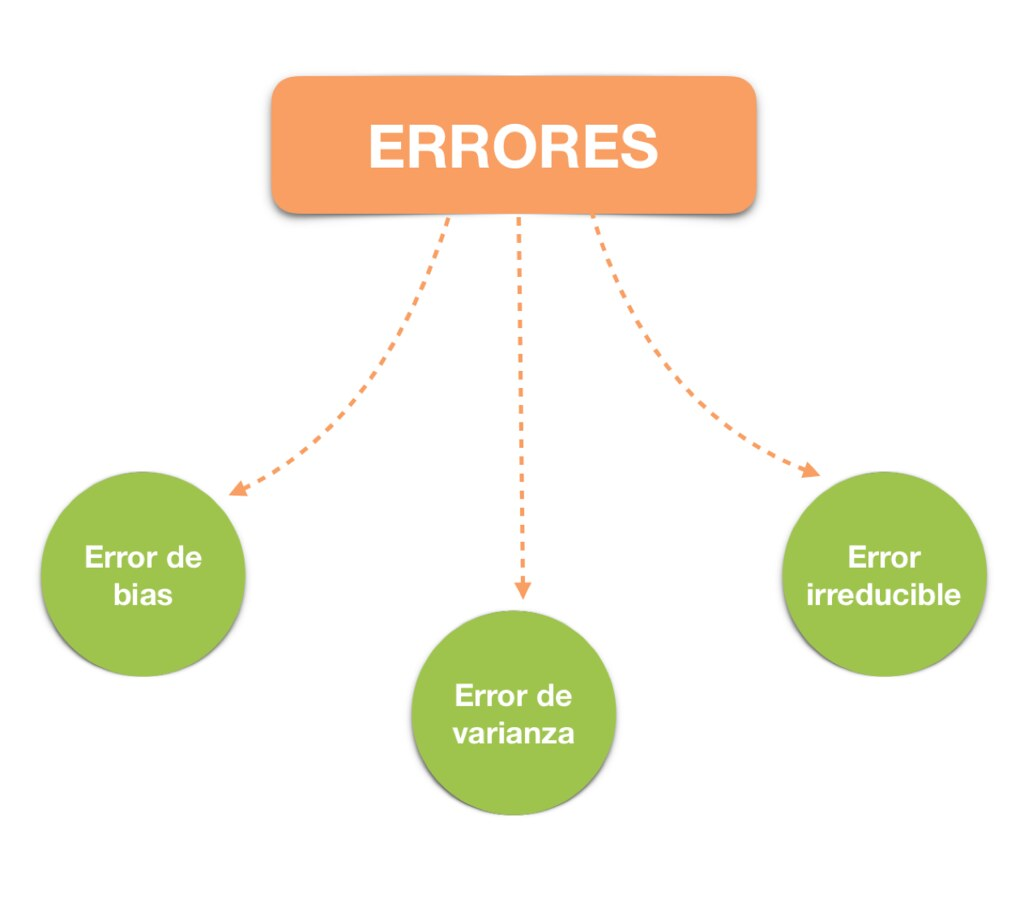

Podemos entender esto más fácilmente en la siguiente imagen.


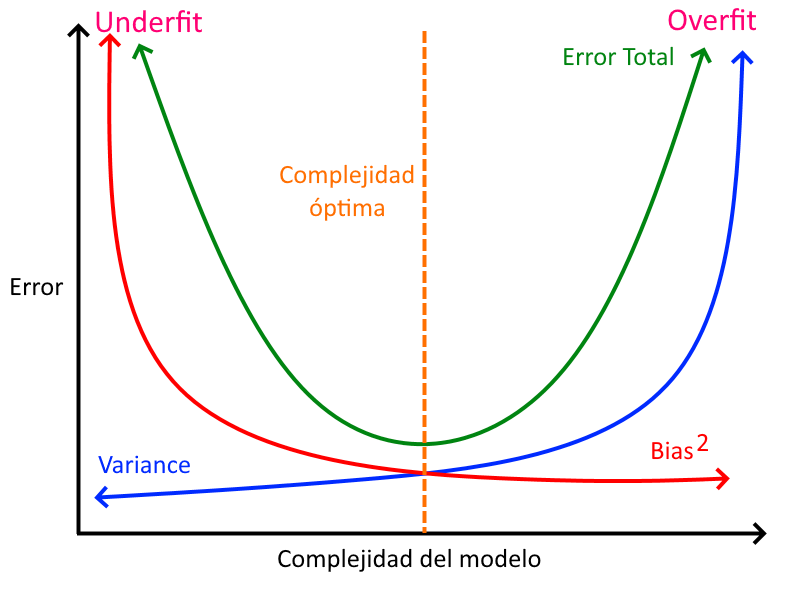

Una imagen clásica para explicar este concepto consiste de cuatro blancos (dianas) donde podemos ver el efecto de Bias y Variance.

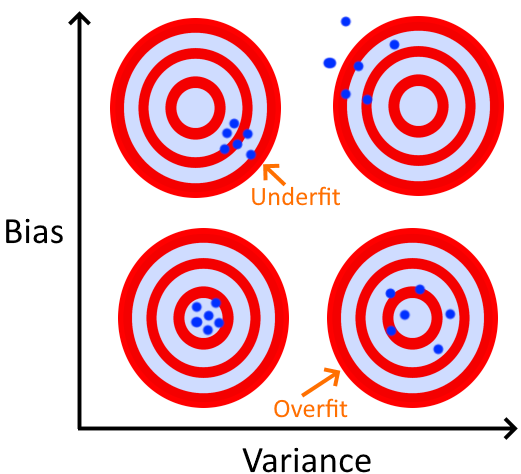

Al observar la imagen podemos entender el comportamiento de cada tipo de error. Si el Bias es pequeño nos encontramos cerca del centro, pero si se incrementa nos alejamos de él. Con la varianza podemos observar que si el valor es pequeño los puntos se encuentran cercanos entre sí, pero al aumentar los puntos se encuentran dispersos. Solamente si bajamos el error en ambos podemos tener los mejores resultados.

Al bajar el Bias y Variance reducimos el error total del modelo, lo que nos acerca a tener un modelo óptimo. Al lograr esto tenemos un modelo que no es muy complejo o muy sencillo. ¿Por qué es esto importante? Si tenemos un modelo complejo tendemos a tener overfitting, pero si tenemos un modelo sencillo lo que lograremos es underfitting.

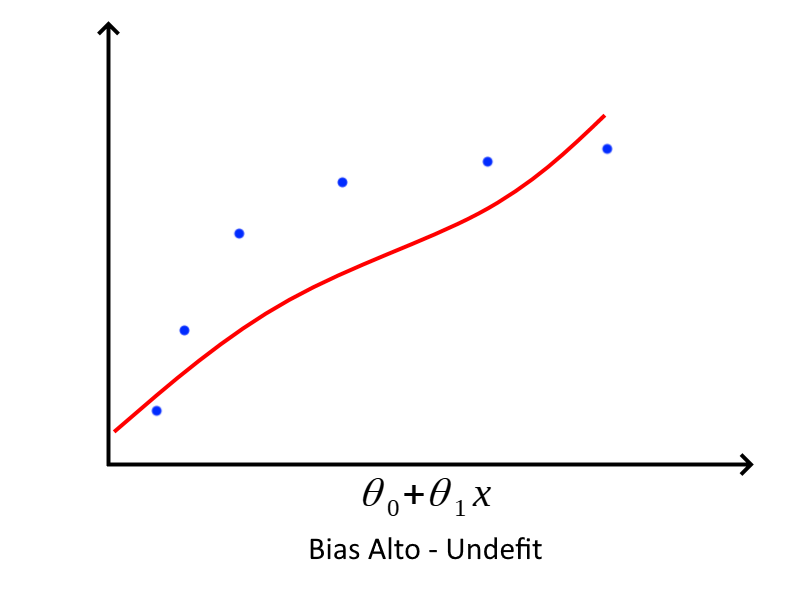

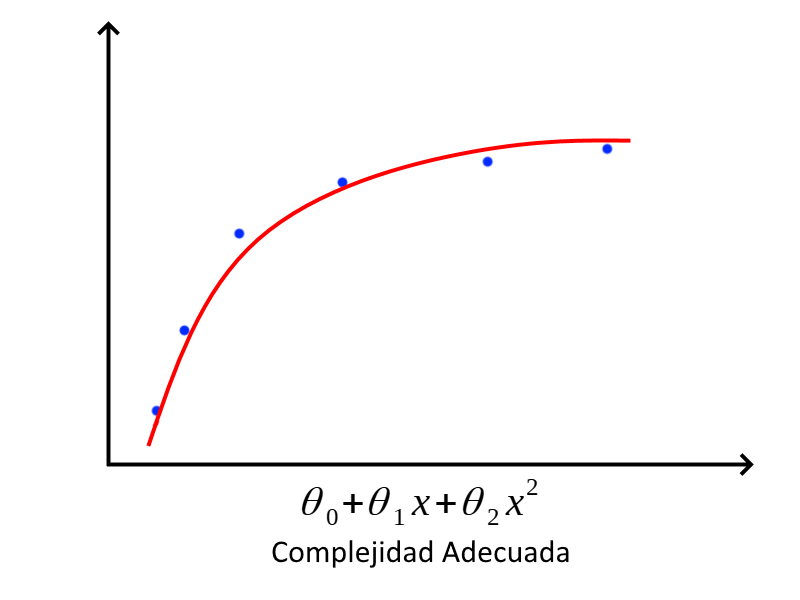

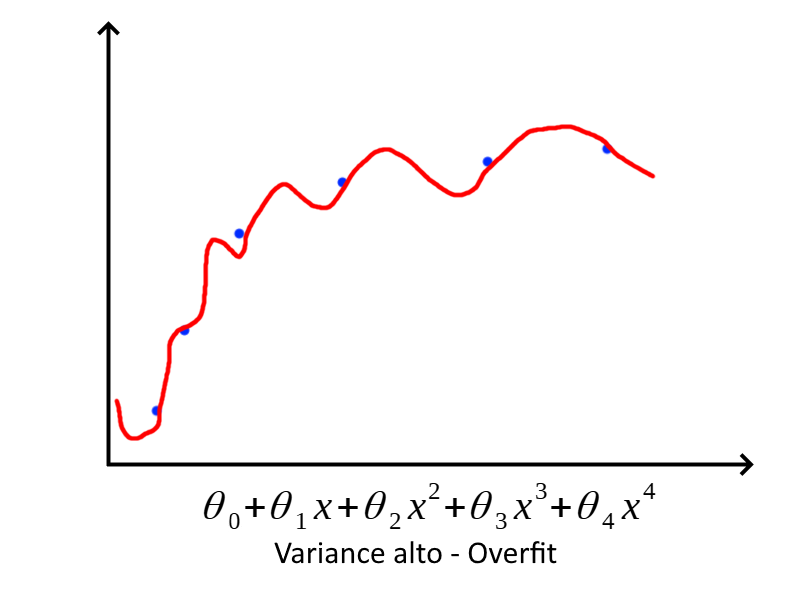

La curva verde nos indica como se modifica el valor del error al cambiar el valor de Bias o de Variance. Si observamos hay un punto donde el error total del modelo es más bajo. En ese punto el valor de Bias y Variance nos permite tener la complejidad óptima del modelo, lo que significa que tendremos el menor error. Todo este concepto es la compensación Bias-Variance o Bias-Variance tradeoff.



Es importante conocer que puede producir el underfitting y el overfitting ahora que ya tenemos los conceptos de Bias y Variance claros.

## ¿Cuando sucede el underfitting?

Puede suceder cuando tenemos una cantidad baja de parámetros en el modelo y no se puede capturar la esencia de los datos de entrenamiento.

Cuando tenemos un Bias alto y Variance bajo.

También puede ocasionarse cuando tenemos tan pocos datos que no se puede construir un modelo adecuado.

Si intentamos construir un modelo lineal cuando los datos no son lineales también surge este problema.




## ¿Cuando sucede el overfitting?

Cuando tenemos muchos predictores o parámetros lo cual ocasiona que se capture el ruido junto con el patrón de los datos. Esto hace que el modelo se ajuste mucho a los datos de entrenamiento perdiendo generalidad para poder trabajar con datos no vistos.

Si tenemos un valor bajo de Bias y alto de Variance.

Si tenemos un modelo muy complejo para representar datos más sencillos.

Observemos este comportamiento en un modelo real.

![imagen.png](attachment:imagen.png)

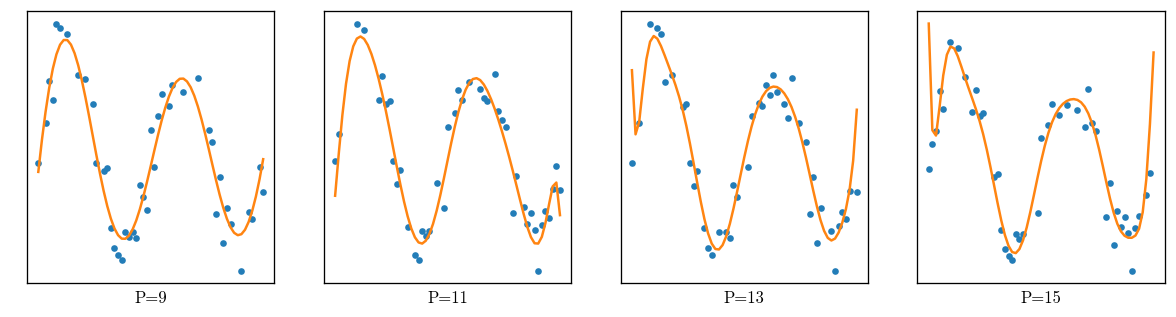

El valor de P indica el grado del polinomio que estamos usando para crear el modelo. Podemos observar que para P=1 y P=2, el modelo no se ajusta bien a los datos, tenemos underfitting. En el caso de P=11 hasta P=15, el modelo trata de exagerar el ajuste a los datos lo que nos indica overfitting. Los demás modelos parecen tener un ajuste adecuado, pero ¿cuál es el mejor?, eso lo podemos saber si observamos el error total de todos los modelos.

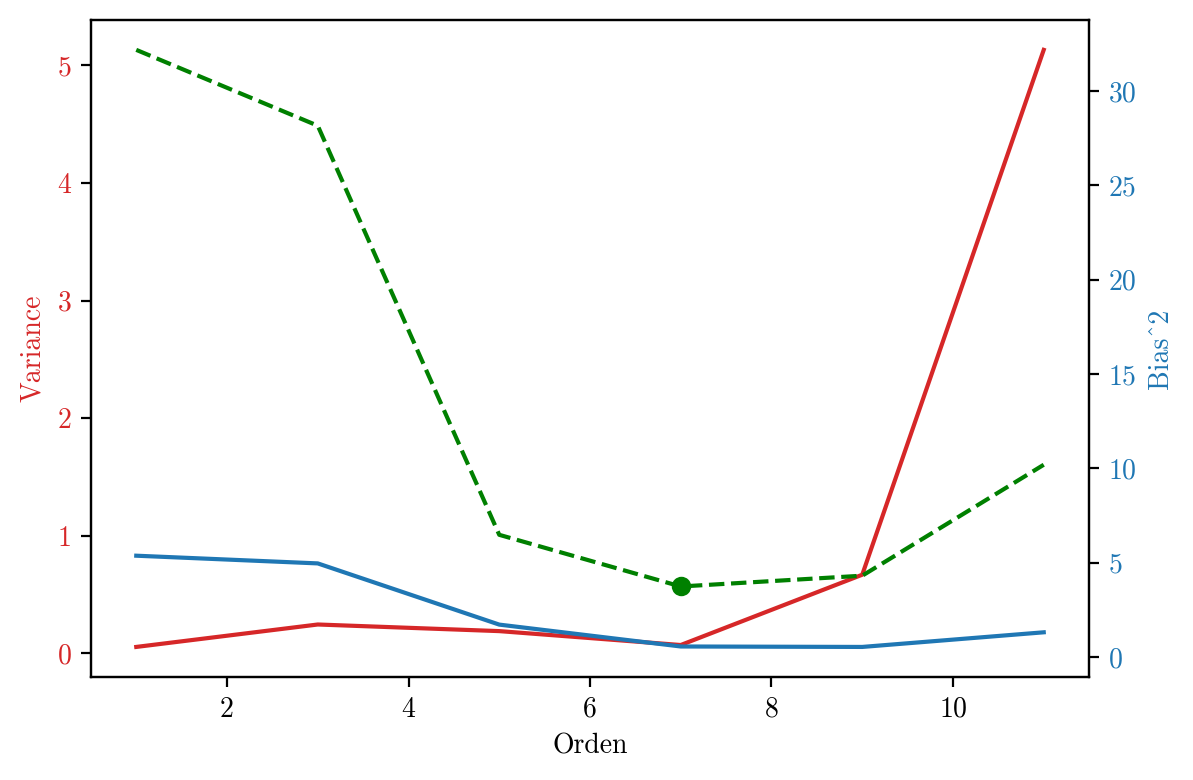

## Como atender estos errores

https://colab.research.google.com/github/goodboychan/chans_jupyter/blob/master/_notebooks/2020-06-03-02-The-Bias-Variance-Tradeoff.ipynb


## Ejemplo en regresión lineal

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from math import pi as PI
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

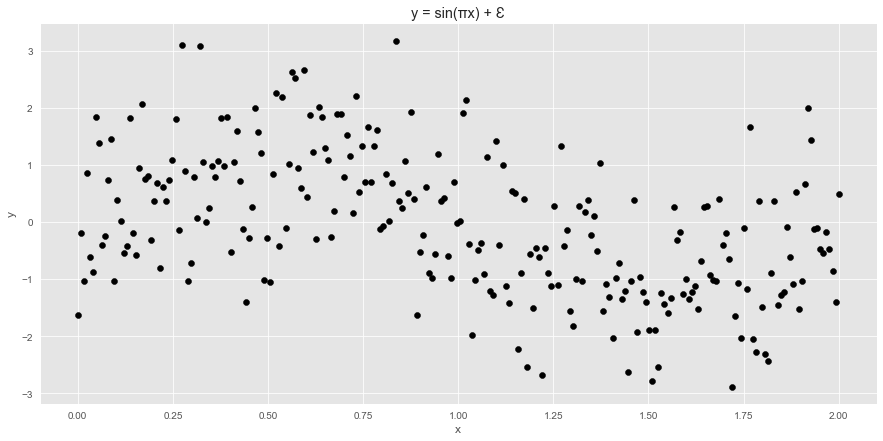

In [21]:

plt.style.use('ggplot')

# for reproducibility across different runs, one may set a seed as follows:
# np.random.seed(42)

# number of observations
NUM_OBS = 250

# predictors
x = np.linspace(0, 2, num = NUM_OBS)
# noise
eps = np.random.normal(0, 1, NUM_OBS)
# outcome
y = np.sin(PI*x) + eps

fig = plt.figure(figsize=(15,7))
ax = plt.axes()
ax.set_title('y = sin(πx) + Ɛ')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x, y, c = 'k')

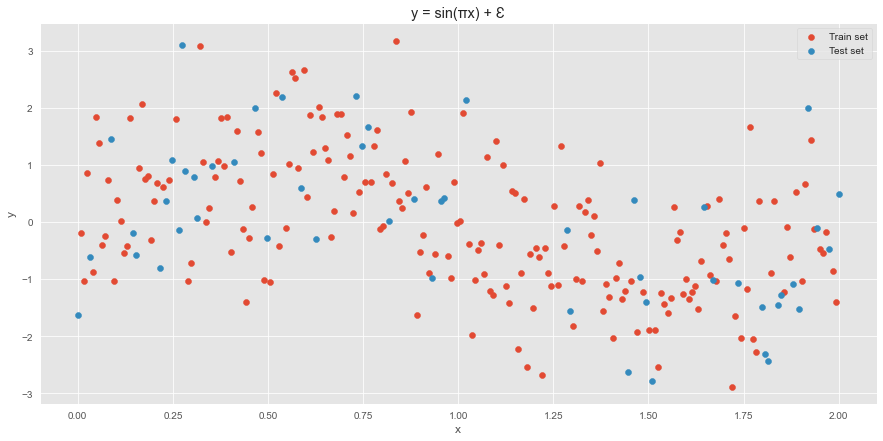

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 1)

fig = plt.figure(figsize = (15,7))
ax = plt.axes()
ax.set_title('y = sin(πx) + Ɛ')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x_train, y_train, label = "Train set")
ax.scatter(x_test, y_test, label = "Test set")
ax.legend()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


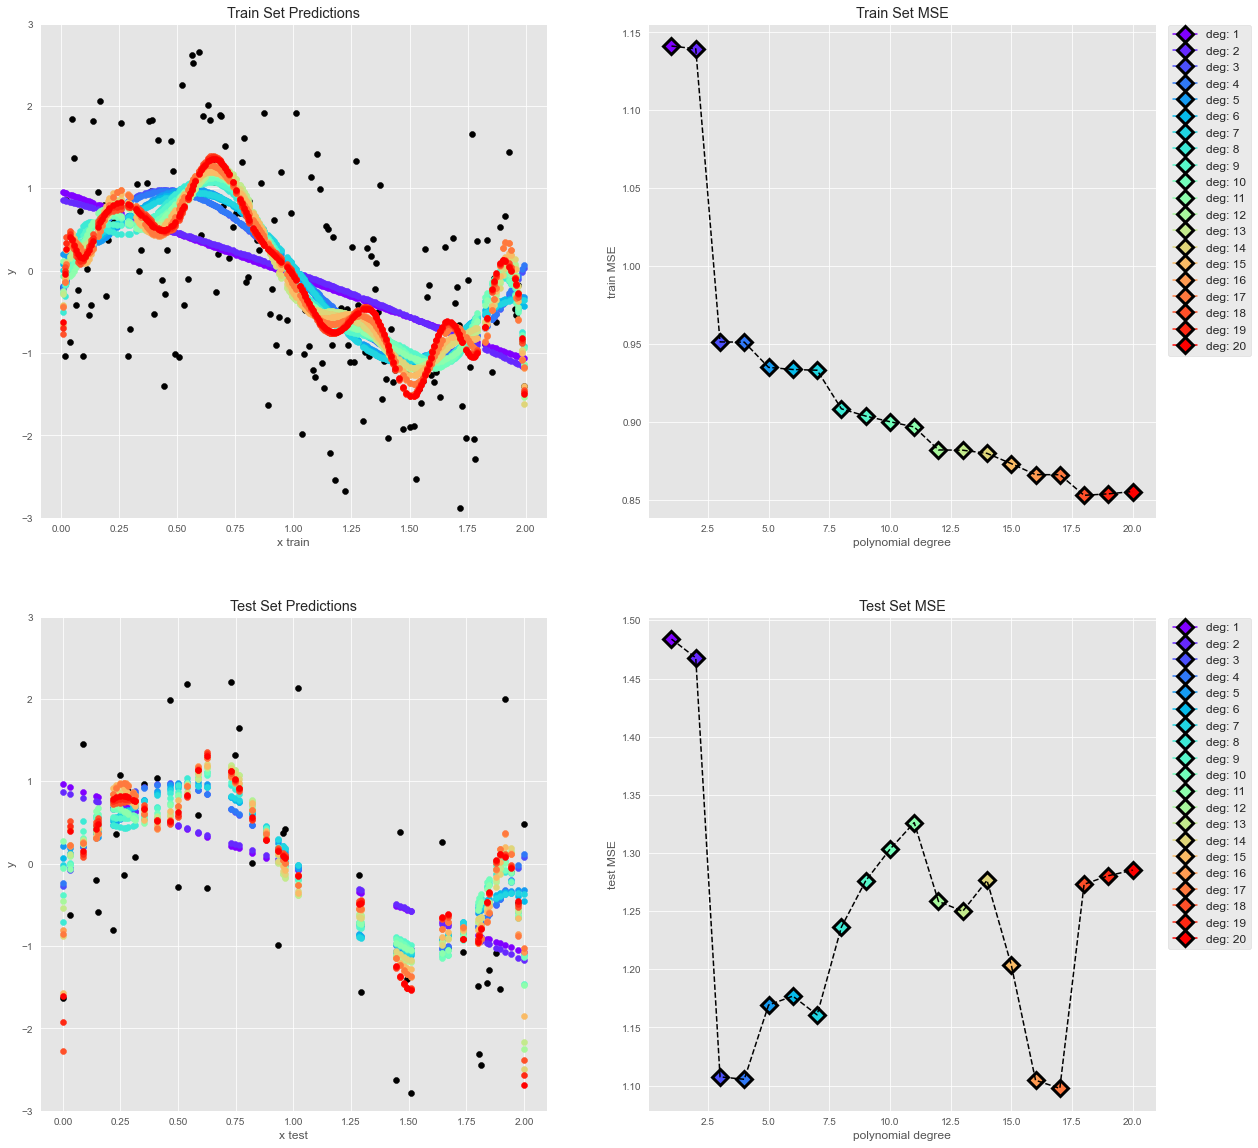

In [23]:
# number of polynomial models to investigate
NUM_MODELS = 20

colors = iter(plt.cm.rainbow(np.linspace(0, 1, NUM_MODELS)))

fig, axs = plt.subplots(2, 2, figsize = (20,20))

axs[0, 0].set_title('Train Set Predictions')
axs[1, 0].set_title('Test Set Predictions')
axs[0, 1].set_title('Train Set MSE')
axs[1, 1].set_title('Test Set MSE')

axs[0, 0].set_xlabel("x train")
axs[0, 0].set_ylabel("y")
axs[0, 0].set_ylim([-3, 3])

axs[1, 0].set_xlabel("x test")
axs[1, 0].set_ylabel("y")
axs[1, 0].set_ylim([-3, 3])

axs[0, 1].set_xlabel("polynomial degree")
axs[0, 1].set_ylabel("train MSE")

axs[1, 1].set_xlabel("polynomial degree")
axs[1, 1].set_ylabel("test MSE")

axs[0,0].scatter(x_train, y_train, c = 'k', label = "y train")
axs[1,0].scatter(x_test, y_test, c = 'k', label = "y test")

train_mse = []
test_mse = []

for k in range(0, NUM_MODELS):
    c = next(colors)

    # k-th degree polynomial coefficients
    fit_coeff = np.polyfit(x_train, y_train, deg = k+1)

    # train and test k-th degree polynomial fit
    y_train_pred = np.polyval(fit_coeff, x_train)
    y_test_pred = np.polyval(fit_coeff, x_test)

    # plot train and test k-th degree polynomial fit
    
    axs[0,0].scatter(x_train,
                   y_train_pred,
                   color = c,
                   label = "deg: {}".format(k+1))
  
    axs[1,0].scatter(x_test,
                   y_test_pred,
                   color = c,
                   label = "deg: {}".format(k+1))
    
    
    # train and test MSE of k-th degree polynomial fit 
    iter_train_mse = mean_squared_error(y_train_pred, y_train)
    iter_test_mse = mean_squared_error(y_test_pred, y_test)

    train_mse.append(iter_train_mse)
    test_mse.append(iter_test_mse)

    # plot train and test MSE of k-th degree polynomial fit
    
    axs[0,1].plot(k+1,
                iter_train_mse,
                color = c,
                label = "deg: {}".format(k+1),
                marker = 'D',
                markersize = 12,
                markeredgecolor = 'black',
                markeredgewidth = 3)
  
    axs[1,1].plot(k+1,
                iter_test_mse,
                color = c,
                label = "deg: {}".format(k+1),
                marker = 'D',
                markersize = 12,
                markeredgecolor = 'black',
                markeredgewidth = 3)
    

# plot dashed line to interpolate MSE measures
axs[0,1].plot(range(1,NUM_MODELS+1), train_mse, 'k--')
axs[1,1].plot(range(1,NUM_MODELS+1), test_mse, 'k--')

# draw legends
axs[0,1].legend(loc = "upper right", bbox_to_anchor = (1.2, 1.01), prop = {'size': 12})
axs[1,1].legend(loc = "upper right", bbox_to_anchor = (1.2, 1.01), prop = {'size': 12})

In [24]:
print("Best fit polynomial degree: ", test_mse.index(min(test_mse)))

Best fit polynomial degree:  16


In [27]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeRegressor
from mlxtend.data import boston_housing_data
from sklearn.model_selection import train_test_split


#X_train, X_test, y_train, y_test = train_test_split(x_train, y_train,
#                                                    test_size=0.3,
#                                                    random_state=123,
#                                                    shuffle=True)



tree_regressor = DecisionTreeRegressor(random_state=123)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        tree_regressor, x_train.reshape(-1,1), y_train, x_test.reshape(-1,1), y_test, 
        loss='mse',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 1.971
Average bias: 1.425
Average variance: 0.545


In [29]:
tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

In [18]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeRegressor
from mlxtend.data import boston_housing_data
from sklearn.model_selection import train_test_split


X, y = boston_housing_data()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True)



tree_otro = DecisionTreeRegressor(random_state=123)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        tree_otro, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 31.536
Average bias: 14.096
Average variance: 17.440


## Ejemplo en clasificación

In [33]:
!pip install --user mlxtend

  Using cached mlxtend-0.20.0-py2.py3-none-any.whl (1.3 MB)
  Using cached scikit_learn-1.0.2-cp37-cp37m-win_amd64.whl (7.1 MB)


In [34]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeClassifier
from mlxtend.data import iris_data
from sklearn.model_selection import train_test_split


X, y = iris_data()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True,
                                                    stratify=y)



tree = DecisionTreeClassifier(random_state=123)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        tree, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.062
Average bias: 0.022
Average variance: 0.040


# Análisis del ERROR

## ¿Cómo tratamos el bias/variance?

## Hechos

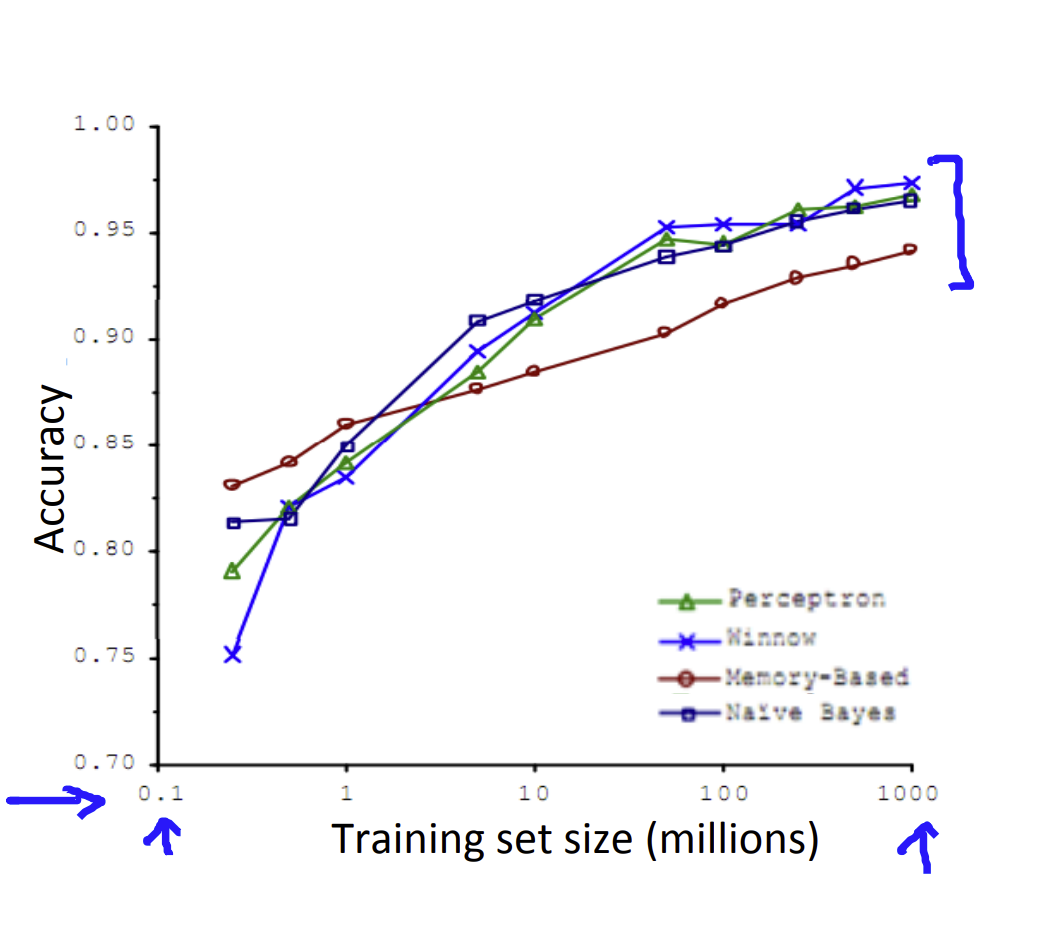


### Mas datos tiende a mejorar la perfomance de casi cualquier algoritmo

### Mas características tiene a mejorar la perfomance de casi cualquier algoritmo

obviamente hablamos de datos y caraterísticas de buena calidad, en condiciones de ser procesadas por los algoritmos



### Enfoque recomendado


1- Iniciar con un modelo simple, rápido de implementar.

2- Agregar un set para hacer cross validation y testear de ésta forma. Esto implica implementar métodos de Resampling, Emsebling, Boosting, Bagging.

3- Dibijar la curva de aprendizaje para determinar si se necesitan mas datos, mas características, etc. 
Repasando: mas datos debería disminuir el bias, mas características debería disminuir la varianza.

4- Analizar el error. 

## Posibles tratamientos con bias y varianza alta



|High Bias |	High Varianza |	 
| :--| :-- | 
|intentar obtener caractedísticas adicionales| obtener mas datos de entrenamiento|
| 	 intentar agregar características polinomiales| 	intentar con un conjunto de características mas pequeño - Reducción dimencional|
|achicar $\lambda$ (lambda: coeficiente de regularización) | 	agrandar $\lambda$ (lambda: coeficiente de regularización)| 	




## Lo que falta:

1- técnicas de regularización: 

2- 

## Referencias

https://www.kaggle.com/code/residentmario/bias-variance-tradeoff/notebook


http://scott.fortmann-roe.com/docs/BiasVariance.html



